In [99]:
#import all packages and libraries
import panel as pn
pn.extension('plotly')
import plotly.express as px
import requests
import pandas as pd
import hvplot.pandas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')
import statistics

In [100]:
#MAPBOX_TOKEN 
load_dotenv()
mapbox_token = os.getenv("MAPBOX_TOKEN")

In [202]:
#load csv and check data
isd_data = pd.read_csv("dfw_real_estate_isd.csv")
#isd_data.dropna(inplace = True) # dropna is dropping all rows
isd_data.shape

(68, 30)

In [203]:
#checking for null value
isd_data.isnull().any()

district_name                    False
county_name                      False
primary_city                     False
total_households_isd             False
median_income_isd                False
mean_income_isd                  False
district_rating_2019             False
district_rating_2019_num         False
grad_rate                         True
dropout_rate                      True
 2016_property_value_total       False
 2016_avg_property_value          True
2016_isd_taxrate                 False
  2016_avg_annual_taxdue         False
 2017_property_value_total       False
 2017_avg_property_value         False
2017_isd_taxrate                 False
 2017_avg_annual_taxdue          False
 2018_property_value_total       False
 2018_avg_property_value         False
2018_isd_taxrate                 False
 2018_avg_annual_taxdue          False
 2019_property_value_total       False
 2019_avg_property_value         False
2019_isd_taxrate                 False
 2019_avg_annual_taxdue  

In [103]:
# Count nulls 
isd_data.isnull().sum()

district_name                 0
county_name                   0
primary_city                  0
2019_median_income            0
district_rating_2018          0
district_rating_2019          0
district_rating_avg           0
grad_rate                    68
dropout_rate                 68
2016_property_value_total     0
2016_avg_property_value       1
2016_isd_taxrate              0
2016_avg_annual_taxdue        0
2017_property_value_total     0
2017_avg_property_value       0
2017_isd_taxrate              0
2017_avg_annual_taxdue        0
2018_property_value_total     0
2018_avg_property_value       0
2018_isd_taxrate              0
2018_avg_annual_taxdue        0
2019_property_value_total     0
2019_avg_property_value       0
2019_isd_taxrate              0
2019_avg_annual_taxdue        0
2020_property_value_total     0
2020_avg_property_value       0
2020_isd_taxrate              0
2020_avg_annual_taxdue        0
dtype: int64

In [204]:
isd_data.drop(columns="grad_rate",inplace=True)
isd_data.drop(columns="dropout_rate",inplace=True)
isd_data.head()

,district_name,county_name,primary_city,total_households_isd,median_income_isd,mean_income_isd,district_rating_2019,district_rating_2019_num,2016_property_value_total,2016_avg_property_value,...,2018_isd_taxrate,2018_avg_annual_taxdue,2019_property_value_total,2019_avg_property_value,2019_isd_taxrate,2019_avg_annual_taxdue,2020_property_value_total,2020_avg_property_value,2020_isd_taxrate,2020_avg_annual_taxdue
0,aledo_isd,tarrant,aledo,8472,124106,154834,A,4,2.801214e+09,443687.0,...,0.015950,7334.272550,4.138532e+09,495499.0,0.014933,7399.286567,4.289396e+09,490579.0,0.014797,7259.10
1,allen_isd,collin,allen,35168,102425,129030,A,4,1.126948e+10,307000.0,...,0.015500,5555.200000,1.520374e+10,373468.0,0.014589,5448.524652,1.600000e+10,371000.0,0.014325,5314.58
2,anna_isd,collin,anna,4521,91239,94781,B,3,8.731257e+08,163000.0,...,0.016700,3595.510000,1.551390e+09,234271.0,0.015683,3674.189229,1.685000e+09,239000.0,0.014746,3524.29
3,argyle_isd,denton,argyle,3995,143902,175273,A,4,1.522886e+09,427365.0,...,0.015851,7522.266888,2.444932e+09,480208.0,0.015080,7241.536640,2.795960e+09,496433.0,0.014187,7042.89
4,arlington_isd,tarrant,arlington,127983,57889,76263,B,3,2.366369e+10,156836.0,...,0.013687,2562.204987,3.189531e+10,210751.0,0.012987,2736.960012,3.317751e+10,209132.0,0.013871,2900.87


In [205]:
isd_data["2016_avg_property_value"]=isd_data["2016_avg_property_value"].fillna(0)

KeyError: '2016_avg_property_value'

In [52]:
isd_data.shape

(68, 27)

In [53]:
isd_data.head()

,district_name,county_name,primary_city,2019_median_income,district_rating_2018,district_rating_2019,district_rating_avg,2016_property_value_total,2016_avg_property_value,2016_isd_taxrate,...,2018_isd_taxrate,2018_avg_annual_taxdue,2019_property_value_total,2019_avg_property_value,2019_isd_taxrate,2019_avg_annual_taxdue,2020_property_value_total,2020_avg_property_value,2020_isd_taxrate,2020_avg_annual_taxdue
0,aledo_isd,tarrant,aledo,44363,A,A,A,2.801214e+09,443687.0,0.015950,...,0.015950,7334.272550,4.138532e+09,495499.0,0.014933,7399.286567,4.289396e+09,490579.0,0.014797,7259.097463
1,allen_isd,collin,allen,101353,A,A,A,1.126948e+10,307000.0,0.015900,...,0.015500,5555.200000,1.520374e+10,373468.0,0.014589,5448.524652,1.600000e+10,371000.0,0.014325,5314.575000
2,anna_isd,collin,anna,44235,C,B,B/C,8.731257e+08,163000.0,0.016700,...,0.016700,3595.510000,1.551390e+09,234271.0,0.015683,3674.189229,1.685000e+09,239000.0,0.014746,3524.294000
3,argyle_isd,denton,argyle,44235,A,A,A,1.522886e+09,427365.0,0.015700,...,0.015851,7522.266888,2.444932e+09,480208.0,0.015080,7241.536640,2.795960e+09,496433.0,0.014187,7042.894971
4,arlington_isd,tarrant,arlington,59179,C,B,B/C,2.366369e+10,156836.0,0.013901,...,0.013687,2562.204987,3.189531e+10,210751.0,0.012987,2736.960012,3.317751e+10,209132.0,0.013871,2900.869972


In [55]:
isd_ranking_df =  isd_data[['district_name','county_name','district_rating_2019']]

In [56]:
isd_ranking_df = isd_ranking_df.rename(columns = {
    "district_rating_2019": "district_rating"
})

In [57]:
isd_ranking_df.head()

,district_name,county_name,district_rating
0,aledo_isd,tarrant,A
1,allen_isd,collin,A
2,anna_isd,collin,B
3,argyle_isd,denton,A
4,arlington_isd,tarrant,B


In [58]:
isd_ranking_df.district_rating[isd_ranking_df.district_rating =='A'] =4
isd_ranking_df.district_rating[isd_ranking_df.district_rating =='B'] =3
isd_ranking_df.district_rating[isd_ranking_df.district_rating =='C'] =2
isd_ranking_df.district_rating[isd_ranking_df.district_rating =='D'] =1

In [59]:
isd_ranking_df.head()

,district_name,county_name,district_rating
0,aledo_isd,tarrant,4
1,allen_isd,collin,4
2,anna_isd,collin,3
3,argyle_isd,denton,4
4,arlington_isd,tarrant,3


In [60]:
isd_2016_df =  isd_data[['district_name','county_name','2016_property_value_total', '2016_avg_property_value','2016_isd_taxrate', '2016_avg_annual_taxdue']]

In [61]:
isd_2016_df = isd_2016_df.rename(columns = {
    "2016_property_value_total": "property_value_total",
    "2016_avg_property_value": "avg_property_value",
    "2016_isd_taxrate":"isd_taxrate",
    "2016_avg_annual_taxdue":"avg_annual_taxdue"
})

In [62]:
isd_2016_df.head()

,district_name,county_name,property_value_total,avg_property_value,isd_taxrate,avg_annual_taxdue
0,aledo_isd,tarrant,2.801214e+09,443687.0,0.015950,"7,076.81"
1,allen_isd,collin,1.126948e+10,307000.0,0.015900,"4,881.30"
2,anna_isd,collin,8.731257e+08,163000.0,0.016700,"2,722.10"
3,argyle_isd,denton,1.522886e+09,427365.0,0.015700,"6,709.84"
4,arlington_isd,tarrant,2.366369e+10,156836.0,0.013901,"2,180.15"


In [63]:
isd_2016_df.dtypes

district_name            object
county_name              object
property_value_total    float64
avg_property_value      float64
isd_taxrate             float64
avg_annual_taxdue        object
dtype: object

In [64]:

#isd_2016_df["county_name"] = isd_2016_df["county_name"].astype(pd.StringDtype())
#isd_2016_df["avg_annual_taxdue"]= isd_2016_df["avg_annual_taxdue"].str.replace(",", "")
#isd_2016_df["avg_annual_taxdue"]= isd_2016_df["avg_annual_taxdue"].str.replace("-", "")
#isd_2016_df["avg_annual_taxdue"]= isd_2016_df["avg_annual_taxdue"].str.replace("    ", "")
#isd_2016_df["avg_annual_taxdue"] = pd.to_numeric(isd_2016_df["avg_annual_taxdue"])
#isd_2016_df.dtypes
#isd_2016_df["avg_annual_taxdue"] = isd_2016_df["avg_annual_taxdue"].astype("float")

In [65]:
isd_2016_df = isd_2016_df.astype({"district_name":"str","county_name":"str"})

In [66]:
isd_2016_df["avg_annual_taxdue"]= isd_2016_df["avg_annual_taxdue"].str.replace(",", "")
isd_2016_df["avg_annual_taxdue"]= isd_2016_df["avg_annual_taxdue"].str.replace("-", "")
isd_2016_df["avg_annual_taxdue"]= isd_2016_df["avg_annual_taxdue"].str.replace("    ", "")
isd_2016_df["avg_annual_taxdue"] = pd.to_numeric(isd_2016_df["avg_annual_taxdue"])
isd_2016_df.dtypes

district_name            object
county_name              object
property_value_total    float64
avg_property_value      float64
isd_taxrate             float64
avg_annual_taxdue       float64
dtype: object

In [70]:
scatter_plot = px.scatter(isd_2016_df,x="avg_property_value",y="district_name", size = "avg_property_value", color = "county_name")

In [71]:
#scatter_plot

In [72]:
isd_2017_df =  isd_data[['district_name','county_name','2017_property_value_total', '2017_avg_property_value','2017_isd_taxrate', '2017_avg_annual_taxdue']]

In [73]:
isd_2017_df = isd_2017_df.rename(columns = {
    "2017_property_value_total": "property_value_total",
    "2017_avg_property_value": "avg_property_value",
    "2017_isd_taxrate":"isd_taxrate",
    "2017_avg_annual_taxdue":"avg_annual_taxdue"
})

In [74]:
isd_2017_df.dtypes

district_name            object
county_name              object
property_value_total    float64
avg_property_value      float64
isd_taxrate             float64
avg_annual_taxdue       float64
dtype: object

In [75]:
isd_2017_df.head()

,district_name,county_name,property_value_total,avg_property_value,isd_taxrate,avg_annual_taxdue
0,aledo_isd,tarrant,3.233804e+09,452629.0,0.015950,7219.432550
1,allen_isd,collin,1.263121e+10,336000.0,0.015900,5342.400000
2,anna_isd,collin,1.072846e+09,190000.0,0.016700,3173.000000
3,argyle_isd,denton,1.797676e+09,442185.0,0.015851,7008.853343
4,arlington_isd,tarrant,2.586012e+10,174311.0,0.013687,2385.742364


In [76]:
isd_2018_df =  isd_data[['district_name','county_name','2018_property_value_total', '2018_avg_property_value','2018_isd_taxrate', '2018_avg_annual_taxdue']]

In [77]:
isd_2018_df = isd_2018_df.rename(columns = {
    "2018_property_value_total": "property_value_total",
    "2018_avg_property_value": "avg_property_value",
    "2018_isd_taxrate":"isd_taxrate",
    "2018_avg_annual_taxdue":"avg_annual_taxdue"
})

In [78]:
isd_2018_df.dtypes

district_name            object
county_name              object
property_value_total    float64
avg_property_value      float64
isd_taxrate             float64
avg_annual_taxdue       float64
dtype: object

In [79]:
isd_2018_df.head()

,district_name,county_name,property_value_total,avg_property_value,isd_taxrate,avg_annual_taxdue
0,aledo_isd,tarrant,3.511184e+09,459829.0,0.015950,7334.272550
1,allen_isd,collin,1.405616e+10,358400.0,0.015500,5555.200000
2,anna_isd,collin,1.334815e+09,215300.0,0.016700,3595.510000
3,argyle_isd,denton,2.117302e+09,474576.0,0.015851,7522.266888
4,arlington_isd,tarrant,2.839404e+10,187204.0,0.013687,2562.204987


In [80]:
isd_2019_df =  isd_data[['district_name','county_name','2019_property_value_total', '2019_avg_property_value','2019_isd_taxrate', '2019_avg_annual_taxdue']]

In [81]:
isd_2019_df = isd_2019_df.rename(columns = {
    "2019_property_value_total": "property_value_total",
    "2019_avg_property_value": "avg_property_value",
    "2019_isd_taxrate":"isd_taxrate",
    "2019_avg_annual_taxdue":"avg_annual_taxdue"
})

In [82]:
isd_2019_df.dtypes

district_name            object
county_name              object
property_value_total    float64
avg_property_value      float64
isd_taxrate             float64
avg_annual_taxdue       float64
dtype: object

In [83]:
isd_2019_df.head()

,district_name,county_name,property_value_total,avg_property_value,isd_taxrate,avg_annual_taxdue
0,aledo_isd,tarrant,4.138532e+09,495499.0,0.014933,7399.286567
1,allen_isd,collin,1.520374e+10,373468.0,0.014589,5448.524652
2,anna_isd,collin,1.551390e+09,234271.0,0.015683,3674.189229
3,argyle_isd,denton,2.444932e+09,480208.0,0.015080,7241.536640
4,arlington_isd,tarrant,3.189531e+10,210751.0,0.012987,2736.960012


In [84]:
isd_data['2020_avg_annual_taxdue'] = isd_data['2020_avg_annual_taxdue ']

In [85]:
isd_2020_df =  isd_data[['district_name','county_name','2020_property_value_total', '2020_avg_property_value','2020_isd_taxrate', '2020_avg_annual_taxdue']]

In [86]:
isd_2020_df = isd_2020_df.rename(columns = {
    "2020_property_value_total": "property_value_total",
    "2020_avg_property_value": "avg_property_value",
    "2020_isd_taxrate":"isd_taxrate",
    "2020_avg_annual_taxdue":"avg_annual_taxdue"
})

In [87]:
#isd_2020_df.dtypes

district_name            object
county_name              object
property_value_total    float64
avg_property_value      float64
isd_taxrate             float64
avg_annual_taxdue       float64
dtype: object

In [201]:
#isd_2020_df.head()

In [200]:
statistics.mean(isd_2020_df['avg_annual_taxdue'])

4451.356416029412

In [89]:
fig_line = px.line(isd_2020_df, x="district_name", y="avg_property_value", color='county_name', line_group="county_name", hover_name="district_name")
#fig_line.show()

In [90]:
isd_data.columns

Index(['district_name', 'county_name', 'primary_city', '2019_median_income',
       'district_rating_2018', 'district_rating_2019', 'district_rating_avg',
       '2016_property_value_total', '2016_avg_property_value',
       '2016_isd_taxrate', '2016_avg_annual_taxdue',
       '2017_property_value_total', '2017_avg_property_value',
       '2017_isd_taxrate', '2017_avg_annual_taxdue',
       '2018_property_value_total', '2018_avg_property_value',
       '2018_isd_taxrate', '2018_avg_annual_taxdue',
       '2019_property_value_total', '2019_avg_property_value',
       '2019_isd_taxrate', '2019_avg_annual_taxdue',
       '2020_property_value_total', '2020_avg_property_value',
       '2020_isd_taxrate', '2020_avg_annual_taxdue ',
       '2020_avg_annual_taxdue'],
      dtype='object')

In [91]:
isd_mean = isd_data[["county_name","2016_avg_property_value","2017_avg_property_value","2018_avg_property_value","2019_avg_property_value","2020_avg_property_value"]]
#isd_mean.head()
fig_bar_all = px.bar(isd_mean, x="county_name", y=["2016_avg_property_value","2017_avg_property_value","2018_avg_property_value","2019_avg_property_value","2020_avg_property_value"], title="avg_property_value")
#fig_bar_all.show()

In [92]:
fig_tax =px.sunburst(
    isd_2020_df[isd_2020_df["county_name"] == "collin"],
    names='district_name',
    parents='county_name',
    values='avg_annual_taxdue',
    color='district_name'
)
#fig_tax.show()

In [93]:
fig_rate =px.sunburst(
    isd_ranking_df[isd_ranking_df["county_name"] == "collin"],
    names='district_name',
    parents='county_name',
    values='district_rating',
    color='district_name'
)
#fig_rate.show()

In [94]:
sunburst = pn.Row(fig_tax, fig_rate)

In [78]:
#sunburst

In [127]:
isd_data_by_county = isd_data.groupby(['district_name','county_name']).mean().reset_index()
isd_data_by_county.head(10)

,district_name,county_name,2019_median_income,2016_property_value_total,2016_avg_property_value,2016_isd_taxrate,2017_property_value_total,2017_avg_property_value,2017_isd_taxrate,2017_avg_annual_taxdue,...,2018_isd_taxrate,2018_avg_annual_taxdue,2019_property_value_total,2019_avg_property_value,2019_isd_taxrate,2019_avg_annual_taxdue,2020_property_value_total,2020_avg_property_value,2020_isd_taxrate,2020_avg_annual_taxdue
0,aledo_isd,tarrant,44363,2.801214e+09,443687.0,0.015950,3.233804e+09,452629.0,0.015950,7219.432550,...,0.015950,7334.272550,4.138532e+09,495499.0,0.014933,7399.286567,4.289396e+09,490579.0,0.014797,7259.097463
1,allen_isd,collin,101353,1.126948e+10,307000.0,0.015900,1.263121e+10,336000.0,0.015900,5342.400000,...,0.015500,5555.200000,1.520374e+10,373468.0,0.014589,5448.524652,1.600000e+10,371000.0,0.014325,5314.575000
2,anna_isd,collin,44235,8.731257e+08,163000.0,0.016700,1.072846e+09,190000.0,0.016700,3173.000000,...,0.016700,3595.510000,1.551390e+09,234271.0,0.015683,3674.189229,1.685000e+09,239000.0,0.014746,3524.294000
3,argyle_isd,denton,44235,1.522886e+09,427365.0,0.015700,1.797676e+09,442185.0,0.015851,7008.853343,...,0.015851,7522.266888,2.444932e+09,480208.0,0.015080,7241.536640,2.795960e+09,496433.0,0.014187,7042.894971
4,arlington_isd,tarrant,59179,2.366369e+10,156836.0,0.013901,2.586012e+10,174311.0,0.013687,2385.742364,...,0.013687,2562.204987,3.189531e+10,210751.0,0.012987,2736.960012,3.317751e+10,209132.0,0.013871,2900.869972
5,aubrey_isd,denton,59179,8.295684e+08,204580.0,0.015100,9.663479e+08,225863.0,0.015100,3410.531300,...,0.015900,3833.362800,1.185617e+09,255287.0,0.015683,4003.793665,1.332791e+09,268222.0,0.015087,4046.665314
6,azle_isd,tarrant,72383,2.452855e+09,161428.0,0.012030,2.625687e+09,179559.0,0.013290,2386.339110,...,0.013290,2507.597070,3.243970e+09,211373.0,0.012474,2636.561116,3.388288e+09,212215.0,0.012474,2647.169910
7,birdville_isd,tarrant,65845,8.502482e+09,154497.0,0.014539,9.376091e+09,173010.0,0.014539,2515.392390,...,0.014539,2716.728462,1.128770e+10,209462.0,0.013839,2898.744618,1.189259e+10,210542.0,0.013803,2906.111226
8,bland_isd,collin,65845,1.070442e+07,139000.0,0.014880,1.088350e+07,163000.0,0.014271,2326.173000,...,0.013640,2621.608000,1.549863e+07,202653.0,0.013100,2654.754300,1.850000e+07,215000.0,0.011527,2478.305000
9,blue_ridge_isd,collin,65845,1.652475e+08,106000.0,0.015710,2.084481e+08,151000.0,0.015715,2372.949900,...,0.015715,2801.966670,3.027883e+08,205297.0,0.015683,3219.775500,3.180000e+08,223000.0,0.015240,3398.520000


In [129]:
isd_data_by_county.hvplot.line(
    "district_name",
    "2019_median_income",
    xlabel= "County Name",
    ylabel="Income Value",
    groupby="county_name",
    rot=90,
    width=1000,
    height=800
)

:DynamicMap   [county_name]
   :Curve   [district_name]   (2019_median_income)

In [125]:
isd_data_by_county.hvplot.bar(
    x='district_name', 
    y=['2016_avg_property_value', '2017_avg_property_value','2018_avg_property_value','2019_avg_property_value','2020_avg_property_value'], 
    xlabel='District Name', 
    ylabel='Avg. Property Value', 
    groupby='county_name', 
    rot=90, 
    width=1800, 
    height=800
).opts(yformatter="%.0f")

:DynamicMap   [county_name]
   :Bars   [district_name,Variable]   (value)

In [162]:
#tea_url = "https://services2.arcgis.com/5MVN2jsqIrNZD4tP/arcgis/rest/services/School2020to2021/FeatureServer/0/query?where=1%3D1&outFields=Score,City,Postal,Country,DisplayX,DisplayY,Rank,Zip4,Phone,County_Nam,County_Num,Web_Addres,Performanc,Region&returnGeometry=false&outSR=4326&f=json"
#tea_url = "https://services2.arcgis.com/5MVN2jsqIrNZD4tP/arcgis/rest/services/School2020to2021/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
tea_url ="https://opendata.arcgis.com/datasets/059432fd0dcb4a208974c235e837c94f_0.geojson"

In [170]:
def get_tea_data(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
    response = requests.get(url,headers=headers)
    return response.json()['features']

In [190]:
tea_data = get_tea_data(tea_url)

tea_list = []
for data in tea_data:
    tea_list.append(data['properties'])
df_tea = pd.DataFrame.from_dict(tea_list)
df_tea_filtered = df_tea.loc[(df_tea['County_Nam'] == 'COLLIN COUNTY') | (df_tea['County_Nam'] == 'DALLAS COUNTY') | (df_tea['County_Nam'] == 'DENTON COUNTY') | (df_tea['County_Nam'] == 'TARRANT COUNTY')]
df_tea_filtered = df_tea_filtered.sort_values('County_Nam')
df_tea_filtered.dropna()
df_tea_filtered.head()
#tea_data

,ARC_Addr_1,ARC_Addr_2,ARC_Addres,ARC_City,ARC_Countr,ARC_Neighb,ARC_Post_1,ARC_Postal,ARC_Region,ARC_Subreg,...,UnitType,X,Xmax,Xmin,Y,Ymax,Ymin,Zipcode4,Zipcode5,Zone
5434,,,2200 LAUREL LN,PLANO,,,5121,75074,TX,,...,,-96.685228,-96.684228,-96.686228,33.033982,33.034982,33.032982,5121,75074,
7808,,,301 N FIFTH ST,PRINCETON,,,1002,75407,TX,,...,,-96.495307,-96.492130,-96.496130,33.177433,33.178889,33.174889,1002,75407,
2765,,,11095 MONARCH DR,FRISCO,,,1753,75034,TX,,...,,-96.880474,-96.880071,-96.882071,33.162075,33.163075,33.161075,1753,75034,
4606,,,1616 MONTGOMERY LN,PROSPER,,,,75078,TX,,...,,-96.797231,-96.696231,-96.898231,33.239232,33.340232,33.138232,,75078,
2750,,,11020 CR 504,BLUE RIDGE,,,,75424,TX,,...,,-96.403891,-96.405200,-96.407200,33.309080,33.308857,33.306857,,75424,


In [177]:
df_tea_filtered.columns

Index(['ARC_Addr_1', 'ARC_Addr_2', 'ARC_Addres', 'ARC_City', 'ARC_Countr',
       'ARC_Neighb', 'ARC_Post_1', 'ARC_Postal', 'ARC_Region', 'ARC_Subreg',
       ...
       'UnitType', 'X', 'Xmax', 'Xmin', 'Y', 'Ymax', 'Ymin', 'Zipcode4',
       'Zipcode5', 'Zone'],
      dtype='object', length=112)

In [195]:
px.set_mapbox_access_token(mapbox_token)

In [198]:
map_plot = px.scatter_mapbox(
    df_tea_filtered,
    lat="Y",
    lon="X",
    size="Score",
    color="City",
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_name="District_1",
    title="School Score of City",
    zoom=11
   )
map_plot.show()

4451.356416029412

In [62]:
isd_2016_df.columns

Index(['district_name', 'county_name', 'property_value_total',
       'avg_property_value', 'isd_taxrate', 'avg_annual_taxdue'],
      dtype='object')

In [63]:
market_cap=isd_2016_df.loc[:,["district_name","avg_property_value"]]
market_cap.head()

,district_name,avg_property_value
0,aledo_isd,443687.0
1,allen_isd,307000.0
2,anna_isd,163000.0
3,argyle_isd,427365.0
4,arlington_isd,156836.0


In [64]:
market_cap.set_index("district_name", inplace = True)

In [110]:
#cap_large= market_cap.nlargest(20,"avg_property_value").hvplot.bar() # top largest data 
cap_large= market_cap.nlargest(20,“avg_property_value”)
cap_large=cap_large.hvplot.bar(rot=90,yformatter=“%.2f”,) # top largest data
#cap_large

SyntaxError: invalid character in identifier (<ipython-input-110-8d3ea6c054f8>, line 2)

In [80]:
#exampel BarGraph 2016
fig_bar = isd_2016_df[["county_name","avg_property_value"]].groupby('county_name').mean().hvplot.bar()
#fig_bar

In [81]:
hv_plot= isd_2016_df[["county_name","avg_property_value"]].groupby('county_name').mean().sort_values("avg_property_value").hvplot()
#hv_plot

In [73]:
dashboard = pn.Tabs(
    (
        "Welcome",
        scatter_plot
    ),
    (
        "Bar Analysis",
        fig_bar_all
    ),
    (
        "Large to small Analysis",
        cap_large
    ),
    (
        "Bar Analysis",
        fig_bar
    ),
    (
        "Sunburst Plot Analysis",
        sunburst
    )
)

In [75]:
dashboard.servable()

Tabs(active=3)
    [0] Plotly(Figure, name='Welcome', relayout_data={'autosize': True}, viewport={'xaxis.range': [-90932.61...})
    [1] Plotly(Figure, name='Bar Analysis', relayout_data={'autosize': True}, viewport={'xaxis.range': [-0.5, ...})
    [2] HoloViews(Bars, name='Large to small Analysis')
    [3] HoloViews(Bars, name='Bar Analysis')
    [4] Row
        [0] Plotly(Figure, relayout_data={'autosize': True})
        [1] Plotly(Figure, relayout_data={'autosize': True})

In [195]:
###### IGNORE THE FOLLOWINGS LINES FOR NOW 

In [56]:
market_price_2016 = sfo_data.groupby(['County'])['2016 AVG MARKET VALUE']
market_price_2016_mean = market_price_2016.mean()
market_price_2016_min = market_price_2016_mean.min()
market_price_2016_max = market_price_2016_mean.max()
market_price_2016_std = market_price_2016_mean.std()
market_price_2016_mean

County
Collin     2.239000e+05
Dallas     1.135657e+06
Denton     2.240542e+05
Tarrant    2.294811e+05
Name: 2016 AVG MARKET VALUE, dtype: float64

In [57]:
market_price_2016_min

223900.0

In [58]:
market_price_2016_max

1135656.7197887504

In [59]:
market_price_2016_std

454929.86696796434

In [60]:
market_price_2017 = sfo_data.groupby(['County'])['2017 AVG MARKET VALUE']
market_price_2017_mean = market_price_2017.mean()
market_price_2017_min = market_price_2017_mean.min()
market_price_2017_max = market_price_2017_mean.max()
market_price_2017_std = market_price_2017_mean.std()
market_price_2017_mean

County
Collin     2.545500e+05
Dallas     1.106772e+06
Denton     2.436554e+05
Tarrant    2.519467e+05
Name: 2017 AVG MARKET VALUE, dtype: float64

In [61]:
market_price_2017_min

243655.35294117648

In [62]:
market_price_2017_max

1106772.26874375

In [63]:
market_price_2017_std

428385.9856305617

In [64]:
market_price_2018 = sfo_data.groupby(['County'])['2018 AVG MARKET VALUE']
market_price_2018_mean = market_price_2018.mean()
market_price_2018_min = market_price_2018_mean.min()
market_price_2018_max = market_price_2018_mean.max()
market_price_2018_std = market_price_2018_mean.std()
market_price_2018_mean

County
Collin     2.785800e+05
Dallas     1.166665e+06
Denton     2.629871e+05
Tarrant    2.861510e+05
Name: 2018 AVG MARKET VALUE, dtype: float64

In [65]:
market_price_2018_min

262987.0588235294

In [42]:
market_price_2018_max

1166665.26596875

In [43]:
market_price_2018_std

444931.6766202539

In [44]:
market_price_2019 = sfo_data.groupby(['County'])['2019 AVG MARKET VALUE']
market_price_2019_mean = market_price_2019.mean()
market_price_2019_min = market_price_2019_mean.min()
market_price_2019_max = market_price_2019_mean.max()
market_price_2019_std = market_price_2019_mean.std()
market_price_2019_mean

County
Collin     3.112083e+05
Dallas     1.411518e+06
Denton     2.761989e+05
Tarrant    3.240160e+05
Name: 2019 AVG MARKET VALUE, dtype: float64

In [45]:
market_price_2019_min

276198.8823529412

In [46]:
market_price_2019_max

1411518.41159375

In [47]:
market_price_2019_std

554223.9671784758

In [32]:
market_price_2020 = sfo_data.groupby(['County'])['2020 AVG MARKET VALUE']
market_price_2020_mean = market_price_2020.mean()
market_price_2020_min = market_price_2020_mean.min()
market_price_2020_max = market_price_2020_mean.max()
market_price_2020_std = market_price_2020_mean.std()
market_price_2020_mean

County
Collin     3.173810e+05
Dallas     1.500264e+06
Denton     2.911853e+05
Tarrant    2.825639e+05
Name: 2020 AVG MARKET VALUE, dtype: float64

In [33]:
market_price_2020_min

282563.90476190473

In [35]:
market_price_2020_max

1500263.7276875002

In [34]:
market_price_2020_std

601792.3191783618

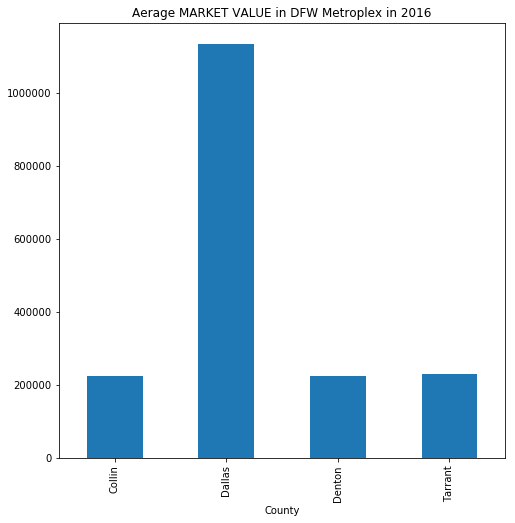

In [67]:
market_price_2016_bar = market_price_2016_mean.plot.bar(figsize=(8,8), x='County', y='2016 AVG MARKET VALUE',title='Aerage MARKET VALUE in DFW Metroplex in 2016')

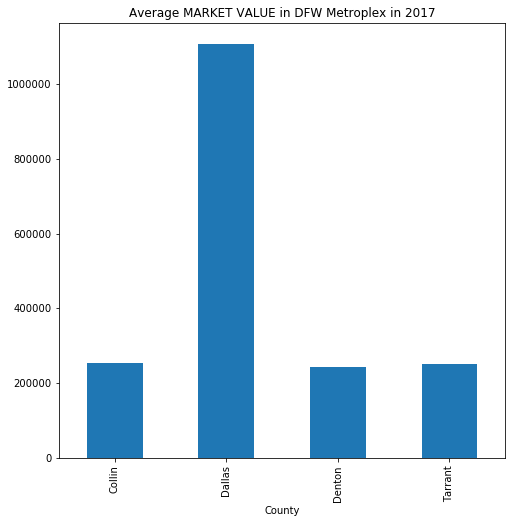

In [68]:
market_price_2017_bar = market_price_2017_mean.plot.bar(figsize=(8,8), x='County', y='2017 AVG MARKET VALUE',title='Average MARKET VALUE in DFW Metroplex in 2017')

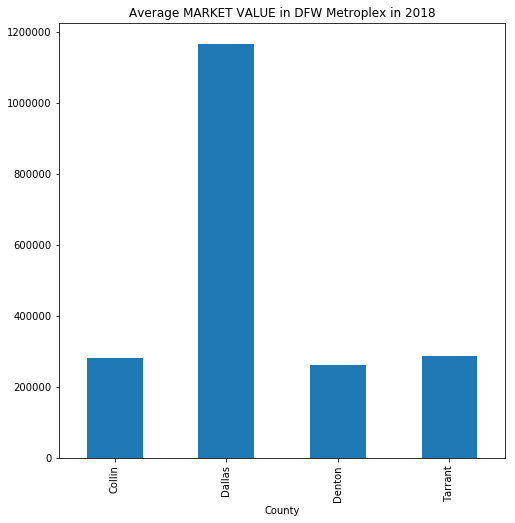

In [50]:
market_price_2018_bar = market_price_2018_mean.plot.bar(figsize=(8,8), x='County', y='2018 AVG MARKET VALUE',title='Average MARKET VALUE in DFW Metroplex in 2018')

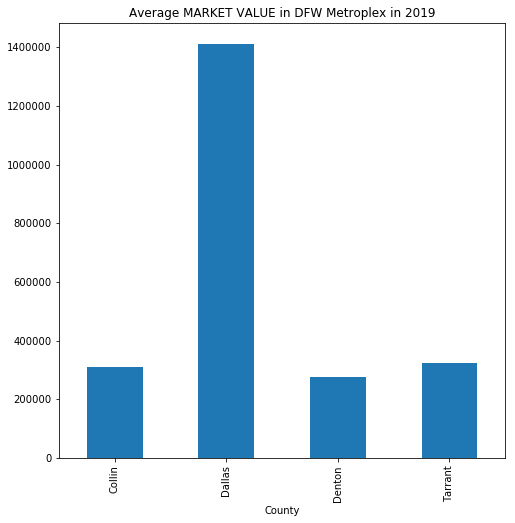

In [69]:
market_price_2019_bar = market_price_2019_mean.plot.bar(figsize=(8,8), x='County', y='2019 AVG MARKET VALUE',title='Average MARKET VALUE in DFW Metroplex in 2019')

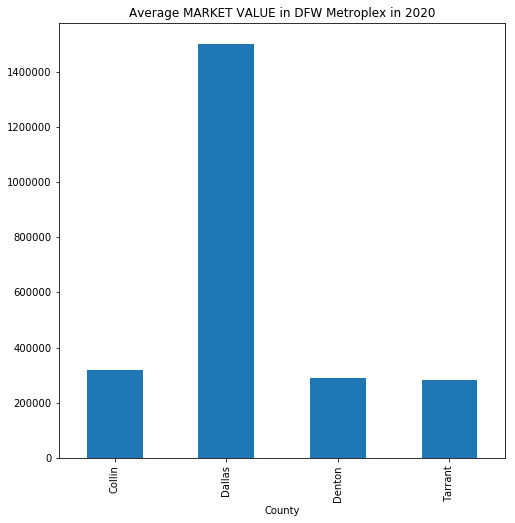

In [70]:
market_price_2020_bar = market_price_2020_mean.plot.bar(figsize=(8,8), x='County', y='2020 AVG MARKET VALUE',title='Average MARKET VALUE in DFW Metroplex in 2020')

In [185]:
tea_url = "https://services2.arcgis.com/5MVN2jsqIrNZD4tP/arcgis/rest/services/School2020to2021/FeatureServer/0/query?where=1%3D1&outFields=Score,City,Postal,Country,DisplayX,DisplayY,Rank,Zip4,Phone,County_Nam,County_Num,Web_Addres,Performanc,Region&returnGeometry=false&outSR=4326&f=json"

In [187]:
def get_tea_data(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36"}
    response = requests.get(url,headers=headers)
    return response.json()['features']

In [188]:
tea_data = get_tea_data(tea_url)
tea_list = []
for data in tea_data:
    tea_list.append(data['attributes'])

df_tea = pd.DataFrame.from_dict(tea_list)
#df_tea.head()

df_tea_filtered = df_tea.loc[(df_tea['County_Nam'] == 'COLLIN COUNTY') | (df_tea['County_Nam'] == 'DALLAS COUNTY') | (df_tea['County_Nam'] == 'DENTON COUNTY') | (df_tea['County_Nam'] == 'TARRANT COUNTY')]

df_tea_filtered = df_tea_filtered.sort_values('County_Nam')
df_tea_filtered.head()

,City,Country,County_Nam,County_Num,DisplayX,DisplayY,Performanc,Phone,Postal,Rank,Region,Score,Web_Addres,Zip4
2,Wylie,USA,COLLIN COUNTY,043,-96.540494,33.00424,https://txschools.gov/schools/043914005/overview,(972) 429-3000,75098,,Texas,90.92,,0490
785,Blue Ridge,USA,COLLIN COUNTY,043,-96.406201,33.30786,https://txschools.gov/schools/043917001/overview,(972) 752-5554,75424,,Texas,100.00,www.brisd.net,9730
144,Plano,USA,COLLIN COUNTY,043,-96.696871,33.02468,https://txschools.gov/schools/043910196/overview,(469) 752-2200,75074,,Texas,100.00,www.pisd.edu,5952
146,Frisco,USA,COLLIN COUNTY,043,-96.847331,33.12671,https://txschools.gov/schools/043905129/overview,(469) 633-3800,75034,,Texas,100.00,www.friscoisd.org,
149,Allen,USA,COLLIN COUNTY,043,-96.660931,33.10937,https://txschools.gov/schools/043901001/overview,(972) 727-0400,75002,,Texas,100.00,ahs.allenisd.org/,3007


In [189]:
tea_isd_url = "https://services2.arcgis.com/5MVN2jsqIrNZD4tP/arcgis/rest/services/2016/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"

In [190]:
tea_isd_data = get_tea_data(tea_isd_url)
#tea_isd_data

In [191]:
tea_isd_list = []
for data_isd in tea_isd_data:
    tea_isd_list.append(data_isd['attributes'])

df_tea_isd = pd.DataFrame.from_dict(tea_isd_list)
#df_tea_isd.head()

df_tea_isd_filtered = df_tea_isd.loc[(df_tea_isd['CNTYNAME'] == 'COLLIN COUNTY') | (df_tea_isd['CNTYNAME'] == 'DALLAS COUNTY') | (df_tea_isd['CNTYNAME'] == 'DENTON COUNTY') | (df_tea_isd['CNTYNAME'] == 'TARRANT COUNTY')]

df_tea_isd_filtered = df_tea_isd_filtered.sort_values('CNTYNAME')
df_tea_isd_filtered.head()

,CAMPNAME,CAMPUS,CHART_TYPE,CITY,CITY_MAIL,CNTYNAME,COUNTY,DISTNAME,DISTRICT,EMAIL,...,OBJECTID_12,PHONE,REGION,RSDNTLFAC,STREET,STREET_MAI,VERIFY,WEB,ZIP,ZIP_MAIL
988,BEVERLY CHEATHAM EL,043901117,,ALLEN,ALLEN,COLLIN COUNTY,043,ALLEN ISD,043901,stephanie_logan@allenisd.org,...,989,(972) 396-3016,10,No,1501 HOPEWELL DR,612 E BETHANY DR,0,www.allenisd.org/cheathames/site/default,75013,75002
746,LETA HORN SMITH,043911105,,PRINCETON,PRINCETON,COLLIN COUNTY,043,PRINCETON ISD,043911,JBoitmann@princetonisd.net,...,747,(469) 952-5400,10,No,2101 FOREST MEADOW DR,2101 FOREST MEADOW DR,,,75407,75407
304,LORENE ROGERS MIDDLE,043912041,,PROSPER,PROSPER,COLLIN COUNTY,043,PROSPER ISD,043912,stshirley@prosper-isd.net,...,305,(469) 219-2150,10,No,1001 S COIT,1001 S COIT,0,www.prosper-isd.net,75078,75078
306,WYLIE H S,043914001,,WYLIE,WYLIE,COLLIN COUNTY,043,WYLIE ISD,043914,virdie.montgomery@wylieisd.net,...,307,(972) 429-3100,10,No,2550 W FM 544,P O BOX 490,0,www.wylieisd.net,75098,75098
339,HIGHTOWER EL,043910138,,PLANO,PLANO,COLLIN COUNTY,043,PLANO ISD,043910,Mariea.Sprott@pisd.edu,...,340,(469) 752-1800,10,No,2601 DECATUR DR,2601 DECATUR DR,1,www.pisd.edu,75093,75093


In [192]:
isd_19_20_url = "https://services2.arcgis.com/5MVN2jsqIrNZD4tP/arcgis/rest/services/Schools2019to2020/FeatureServer/0/query?where=1%3D1&outFields=OBJECTID,Status,Score,Phone,URL,Rank,District,City,Zone,Postal,School_Num,School_Nam,Grade_Rang,Grade_Leve,District_1,DisplayY,DisplayX,County_Num,County_Nam&returnGeometry=false&outSR=4326&f=json"

In [193]:
isd_19_20_data = get_tea_data(isd_19_20_url)
#isd_19_20_data

In [194]:
isd_19_20_list = []
for data_isd in isd_19_20_data:
    isd_19_20_list.append(data_isd['attributes'])

df_isd_19_20 = pd.DataFrame.from_dict(isd_19_20_list)
#df_tea_isd.head()

df_isd_19_20_filtered = df_isd_19_20.loc[((df_isd_19_20['County_Nam'] == 'COLLIN COUNTY') | (df_isd_19_20['County_Nam'] == 'DALLAS COUNTY') | (df_isd_19_20['County_Nam'] == 'DENTON COUNTY') | (df_isd_19_20['County_Nam'] == 'TARRANT COUNTY')) & (df_isd_19_20['Grade_Leve'] == 'High School')]

df_isd_19_20_filtered = df_isd_19_20_filtered.sort_values('District_1')
df_isd_19_20_filtered.head()

,City,County_Nam,County_Num,DisplayX,DisplayY,District,District_1,Grade_Leve,Grade_Rang,OBJECTID,Phone,Postal,Rank,School_Nam,School_Num,Score,Status,URL,Zone
853,Dallas,DALLAS COUNTY,'057,-96.650604,32.706225,,A+ ACADEMY,High School,'07-12,854,,75217,20.0,A+ SECONDARY SCHOOL,'057829002,100.0,M,,
557,Allen,COLLIN COUNTY,'043,-96.658174,33.105403,,ALLEN ISD,High School,'09,558,,75002,20.0,LOWERY FRESHMAN CENTER,'043901002,100.0,M,,
931,Dallas,DALLAS COUNTY,'057,-96.845301,32.925924,,CARROLLTON-FARMERS BRANCH ISD,High School,'09-12,932,,75244,20.0,EARLY COLLEGE H S,'057903010,100.0,T,,
929,Irving,DALLAS COUNTY,'057,-96.945417,32.918895,,CARROLLTON-FARMERS BRANCH ISD,High School,'09-12,930,,75063,20.0,RANCHVIEW H S,'057903007,100.0,M,,
938,Cedar Hill,DALLAS COUNTY,'057,-96.955200,32.622831,,CEDAR HILL ISD,High School,'09-12,939,,75104,20.0,CEDAR HILL COLLEGIATE H S,'057904003,100.0,M,,
